#**STEP 1 : PERKENALAN**

**GRADED CHALLENGE 2**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Logistic Regression dan SVM**

**Graded Challenge 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:**

* Mampu memahami konsep Classification dengan Logistic Regression dan SVM
* Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
* Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

## **STEP 2 : IMPORTING LIBRARY**

**Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, roc_curve, auc
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVR
import time
import warnings
warnings.filterwarnings('ignore')

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Seaborn bertujuan agar visualisasi menjadi bagian penting dari proses eksplorasi dan pemahaman data.

* Plotly merupakan library grafik open source yang dapat digunakan untuk membuat visualisasi data. Library ini dibangun di atas library JavaScript Plotly dan dapat digunakan untuk membuat visualisasi data berbasis web yang dapat ditampilkan pada jupyter notebook atau aplikasi web menggunakan dash dan dapat pula disimpan sebagai file HTML.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

## **STEP 3 : DATA LOADING**

**Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hacktiv8/Phase 1/Graded Challenge/h8dsft_P1W1LGSVM/weatherAUS.csv')

**Data memiliki jumlah baris 145460 dan jumlah kolom 23**

In [4]:
data.shape

(145460, 23)

**Melihat isi 10 data pertama**

In [5]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


**Melihat 10 data tengah**

In [6]:
145460 / 2

72730.0

In [7]:
data[72730:72740]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
72730,2015-08-24,Mildura,8.8,15.4,5.0,3.2,1.6,SSE,39.0,S,S,17.0,20.0,91.0,51.0,1018.3,1018.5,8.0,8.0,9.1,13.1,Yes,No
72731,2015-08-25,Mildura,7.4,16.0,1.0,3.2,3.3,SSW,35.0,S,S,22.0,7.0,73.0,55.0,1024.5,1023.0,4.0,7.0,9.3,15.7,No,No
72732,2015-08-26,Mildura,7.8,18.4,0.0,3.2,8.5,WNW,20.0,E,NNE,9.0,11.0,79.0,34.0,1024.7,1021.5,6.0,7.0,11.9,17.8,No,No
72733,2015-08-27,Mildura,7.6,17.9,0.0,2.4,8.4,SSW,35.0,SW,SSW,9.0,15.0,84.0,33.0,1024.1,1022.2,7.0,4.0,10.3,17.6,No,No
72734,2015-08-28,Mildura,4.3,16.8,0.0,2.4,6.0,SSE,26.0,S,S,15.0,13.0,85.0,46.0,1028.2,1025.4,2.0,6.0,9.0,15.4,No,No
72735,2015-08-29,Mildura,1.4,16.4,0.0,2.6,9.0,SE,30.0,SE,SSW,22.0,13.0,73.0,35.0,1028.5,1025.6,3.0,6.0,8.9,14.9,No,No
72736,2015-08-30,Mildura,-0.5,17.2,0.0,2.6,10.2,SSW,28.0,SE,SSE,11.0,11.0,74.0,35.0,1027.2,1022.8,0.0,0.0,7.9,16.8,No,No
72737,2015-08-31,Mildura,-0.3,18.7,0.0,2.6,10.9,NW,24.0,ESE,SW,9.0,13.0,74.0,30.0,1022.5,1018.6,2.0,0.0,8.4,17.8,No,No
72738,2015-09-01,Mildura,3.7,21.9,0.0,2.8,7.9,NNE,41.0,N,N,11.0,20.0,52.0,27.0,1016.7,1012.6,1.0,6.0,11.6,20.1,No,No
72739,2015-09-02,Mildura,10.5,14.6,0.8,6.0,6.3,NE,26.0,ENE,ENE,15.0,9.0,71.0,84.0,1008.1,1004.6,6.0,7.0,12.7,12.4,No,Yes


**Melihat isi 10 data terakhir**

In [8]:
data.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,E,11.0,11.0,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,ESE,15.0,17.0,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,E,19.0,26.0,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,E,15.0,17.0,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**Melihat nama kolom pada data**

In [9]:
data.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

**Melihat info data dan mengambil informasi tipe data semua kolom**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Melihat nilai keseluruhan data dari masing-masing kolom**

In [11]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Melihat nilai data yang kolomnya bertipe data object**

In [12]:
data.select_dtypes("object").describe().T

,count,unique,top,freq
Date,145460,3436,2017-01-29,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


**Melihat nilai data yang kolomnya bertipe data number**

In [13]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## **STEP 4 : DATA CLEANING**

**Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.**

In [14]:
dtc =  data.copy()

**Mengubah tipe data kolom Date yang sebelumnya bertipe data Object menjadi Datetime**

In [15]:
dtc['Date'] = pd.to_datetime(dtc['Date']).dt.normalize()

**Melihat jumlah data yang missing values pada tiap kolom**

In [16]:
dtc.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [17]:
dtc.isnull().sum() * 100 / len(data)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

**Drop data yang kolomnya berisi nilai Null**

In [18]:
dtc.dropna(inplace=True)

**Menghapus kolom Cloud9am dan Cloud3pm karena merasa tidak dipakai**

In [19]:
dtc.drop(['Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [20]:
dtc.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6,No,No
6055,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,WNW,7.0,20.0,26.0,19.0,1007.7,1007.4,30.7,34.3,No,No
6056,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,17.0,19.0,33.0,15.0,1011.3,1009.9,25.0,31.5,No,No
6057,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,S,15.0,6.0,25.0,9.0,1013.3,1009.2,20.7,32.8,No,No
6058,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,WSW,30.0,9.0,46.0,28.0,1008.3,1004.0,23.4,33.3,No,No
6059,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,WSW,15.0,17.0,61.0,14.0,1007.9,1005.8,24.0,33.6,No,No


**Cek kembali missing valuesnya**

In [21]:
dtc.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Data yang sudah di cleaning sekarang menjadi 56420 total baris dan 21 total kolom**

In [22]:
dtc.shape

(56420, 21)

##**STEP 5 : EXPLORATORY DATA ANALYSIS (EDA)**

**Memisahkan fitur berdasarkan tipe data**

In [23]:
#find feature based on their data types
datype = dtc.dtypes.reset_index()
datype.columns = ['feature', 'type']

#excluding object data types and feautre 'Date'
datype[(datype['type'] != 'object') & (datype['feature'] != 'Date')]

,feature,type
2,MinTemp,float64
3,MaxTemp,float64
4,Rainfall,float64
5,Evaporation,float64
6,Sunshine,float64
8,WindGustSpeed,float64
11,WindSpeed9am,float64
12,WindSpeed3pm,float64
13,Humidity9am,float64
14,Humidity3pm,float64


In [24]:
dfeats = dtc.dtypes.reset_index()
dfeats.columns = ['feature', 'type']

#grouping all features with object datatype as 'column category'
col_category = list(dfeats[dfeats['type'] == 'object']['feature'])

In [25]:
dtc[col_category].head(10)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,Cobar,SSW,ENE,SW,No,No
6050,Cobar,S,SSE,SSE,No,No
6052,Cobar,NNE,NNE,NNW,No,No
6053,Cobar,WNW,WNW,WSW,No,No
6054,Cobar,WNW,NW,WNW,No,No
6055,Cobar,N,N,WNW,No,No
6056,Cobar,SSW,S,SSE,No,No
6057,Cobar,SE,SE,S,No,No
6058,Cobar,ENE,ENE,WSW,No,No
6059,Cobar,NE,NNE,WSW,No,No


In [26]:
#grouping all features with numeric(int and float) datatype as 'column numeric'
col_numeric = list(dfeats[(dfeats['type'] != 'object') & (~dfeats.feature.isin(['Date']))]['feature'])

In [27]:
dtc[col_numeric].head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6
6055,27.1,36.1,0.0,13.0,0.0,43.0,7.0,20.0,26.0,19.0,1007.7,1007.4,30.7,34.3
6056,23.3,34.0,0.0,9.8,12.6,41.0,17.0,19.0,33.0,15.0,1011.3,1009.9,25.0,31.5
6057,16.1,34.2,0.0,14.6,13.2,37.0,15.0,6.0,25.0,9.0,1013.3,1009.2,20.7,32.8
6058,19.0,35.5,0.0,12.0,12.3,48.0,30.0,9.0,46.0,28.0,1008.3,1004.0,23.4,33.3
6059,19.7,35.5,0.0,11.0,12.7,41.0,15.0,17.0,61.0,14.0,1007.9,1005.8,24.0,33.6


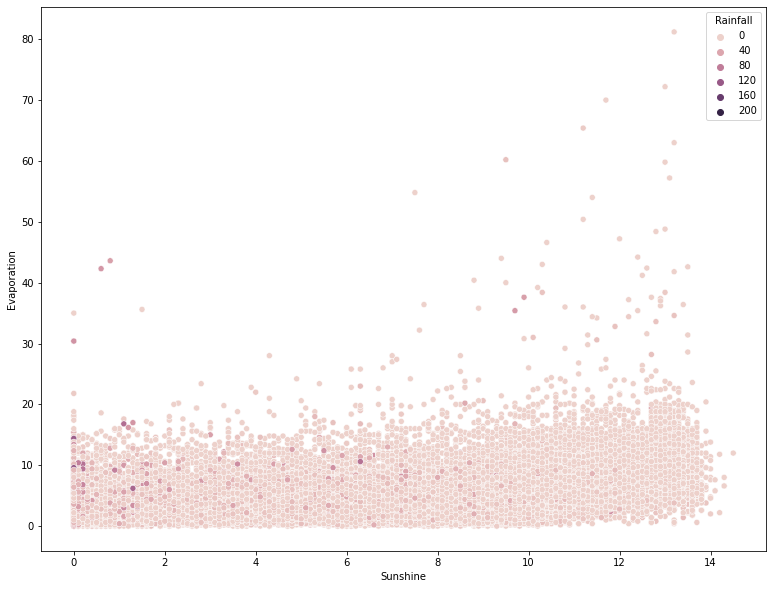

In [28]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=dtc,x='Sunshine',y="Evaporation",hue='Rainfall')

**Rata-rata hujan turun saat intensitas matahari dan penguapan rendah.**

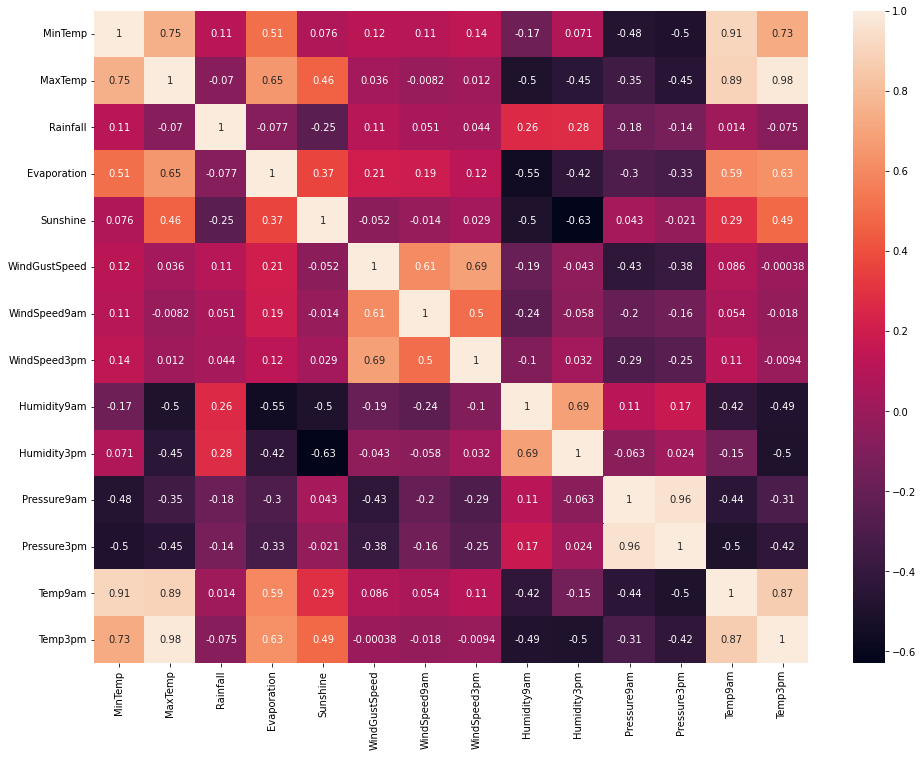

In [29]:
#Check all numeric column correlated with Rainfall
plt.figure(figsize = (16, 12))
hm = sns.heatmap(dtc[col_numeric].corr(), annot = True)

**Fitur yang berkorelasi dengan 'Rainfall' adalah 'WindGustSpeed','Humidity9am', 'Humidity3pm', dan 'MinTemp'**

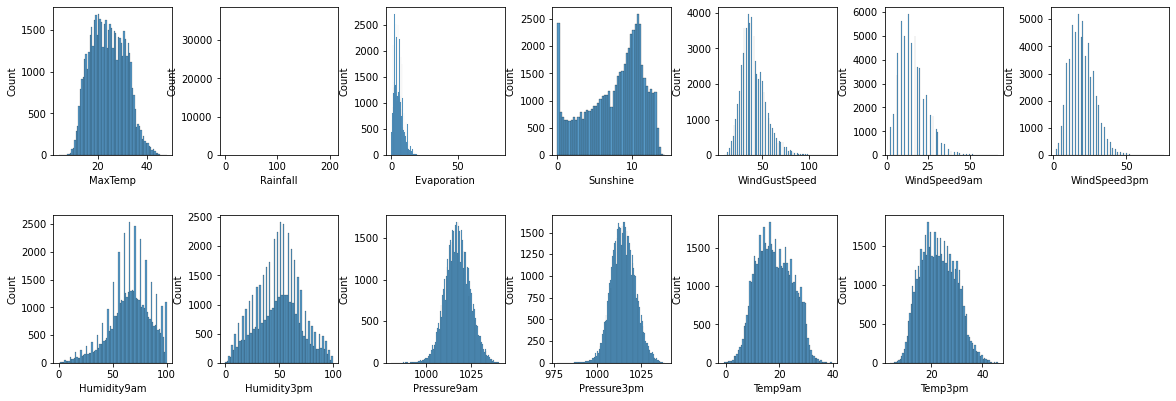

In [30]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(col_numeric)):
    ax = fig.add_subplot(5, 7, i)
    sns.histplot(dtc[col_numeric[i]])
    plt.xlabel(col_numeric[i])

**Rata-rata kolom numerik terdistribusi secara normal**

##**STEP 6 : DATA TRANSFORMATION**

In [31]:
dtc['RainTomorrow'].replace(['Yes', 'No'],[1,0], inplace=True)
dtc['RainToday'].replace(['Yes', 'No'],[1,0], inplace=True)

In [32]:
dtc.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6,0,0
6055,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,WNW,7.0,20.0,26.0,19.0,1007.7,1007.4,30.7,34.3,0,0
6056,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,17.0,19.0,33.0,15.0,1011.3,1009.9,25.0,31.5,0,0
6057,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,S,15.0,6.0,25.0,9.0,1013.3,1009.2,20.7,32.8,0,0
6058,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,WSW,30.0,9.0,46.0,28.0,1008.3,1004.0,23.4,33.3,0,0
6059,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,WSW,15.0,17.0,61.0,14.0,1007.9,1005.8,24.0,33.6,0,0


In [33]:
#features based on column that most correlated with RainTomorrow
feature_cols = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity3pm','Humidity9am','RainToday']
X = dtc[feature_cols]
y = dtc['RainTomorrow']

In [34]:
dtc[feature_cols+['RainTomorrow']].corr()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Humidity9am,RainToday,RainTomorrow
Rainfall,1.000000,0.106308,0.050584,0.044112,0.277625,0.263625,0.550515,0.254342
WindGustSpeed,0.106308,1.000000,0.608852,0.685236,-0.042653,-0.193410,0.146276,0.233158
WindSpeed9am,0.050584,0.608852,1.000000,0.502226,-0.058449,-0.236795,0.083125,0.083904
WindSpeed3pm,0.044112,0.685236,0.502226,1.000000,0.031843,-0.100626,0.085627,0.088862
Humidity3pm,0.277625,-0.042653,-0.058449,0.031843,1.000000,0.685697,0.385440,0.455358
Humidity9am,0.263625,-0.193410,-0.236795,-0.100626,0.685697,1.000000,0.379451,0.271033
RainToday,0.550515,0.146276,0.083125,0.085627,0.385440,0.379451,1.000000,0.309098
RainTomorrow,0.254342,0.233158,0.083904,0.088862,0.455358,0.271033,0.309098,1.000000


##**STEP 7 : MODELING**

### **Data Split**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77, stratify=y)

### **Data scaling**

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_trf = scaler.transform(X_train)

### **Create Model**

In [37]:
lr_model = LogisticRegression(solver="lbfgs", random_state=77)
%time lr_model.fit(X_train_trf, y_train)

CPU times: user 112 ms, sys: 79.7 ms, total: 192 ms
Wall time: 106 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=77, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
svc_model = SVC(kernel='linear', random_state=77,C=1)
%time svc_model.fit(X_train_trf, y_train)

CPU times: user 28 s, sys: 304 ms, total: 28.3 s
Wall time: 28.1 s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=77, shrinking=True, tol=0.001,
    verbose=False)

### **Model Inference Logistic Regression**

In [39]:
# classification_report
%time y_test_predict = lr_model.predict(X_test)
print(classification_report(y_test, y_test_predict))

CPU times: user 4.82 ms, sys: 3.08 ms, total: 7.9 ms
Wall time: 7.31 ms
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13198
           1       0.22      1.00      0.36      3728

    accuracy                           0.22     16926
   macro avg       0.11      0.50      0.18     16926
weighted avg       0.05      0.22      0.08     16926



### **Confusion Matrix**

In [40]:
cm = confusion_matrix(y_test, y_test_predict)

In [41]:
print(cm)
print(precision_score(y_test, y_test_predict))
print(recall_score(y_test, y_test_predict))

[[    0 13198]
 [    0  3728]]
0.22025286541415573
1.0


In [42]:
%time y_scores = cross_val_predict(lr_model, X_train, y_train, cv=3,method="decision_function")
y_scores

CPU times: user 1.41 s, sys: 1.03 s, total: 2.45 s
Wall time: 1.3 s


array([-3.82595226,  0.01902646, -3.27023   , ..., -3.38172946,
       -0.94397173, -5.69226304])

In [43]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

CPU times: user 11.7 ms, sys: 12.1 ms, total: 23.8 ms
Wall time: 14 ms


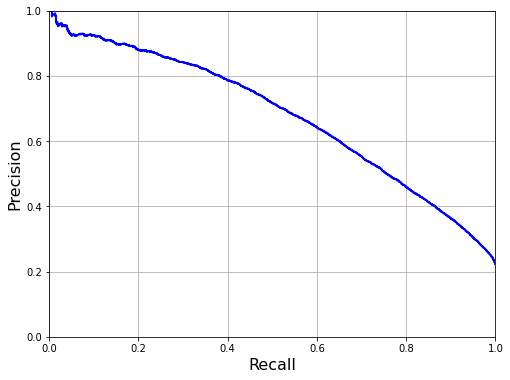

In [44]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### **Model Inference SVC**

In [45]:
# classification_report
%time y_test_predict = svc_model.predict(X_test)
print(classification_report(y_test, y_test_predict))

CPU times: user 2.46 s, sys: 4.04 ms, total: 2.47 s
Wall time: 2.46 s
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13198
           1       0.22      1.00      0.36      3728

    accuracy                           0.22     16926
   macro avg       0.11      0.50      0.18     16926
weighted avg       0.05      0.22      0.08     16926



In [46]:
%time cm = confusion_matrix(y_test, y_test_predict)

CPU times: user 14.8 ms, sys: 0 ns, total: 14.8 ms
Wall time: 15.7 ms


In [47]:
print(cm)
print(precision_score(y_test, y_test_predict))
print(recall_score(y_test, y_test_predict))

[[    0 13198]
 [    0  3728]]
0.22025286541415573
1.0


In [48]:
%time y_scores = cross_val_predict(svc_model, X_train, y_train, cv=3,method="decision_function")
y_scores

CPU times: user 20min 54s, sys: 1.23 s, total: 20min 55s
Wall time: 20min 48s


array([-2.57975872,  0.47855302, -2.14258712, ..., -2.16402134,
       -0.78414154, -3.77427257])

In [49]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

CPU times: user 10.2 ms, sys: 1 µs, total: 10.2 ms
Wall time: 12.3 ms


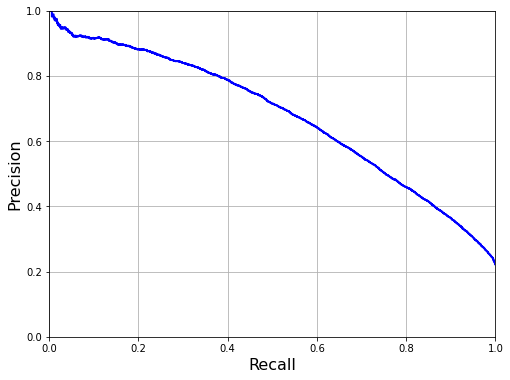

In [50]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## **STEP 8 : MODEL ANALYSIS**

### **Evaluation Logistic Regression**

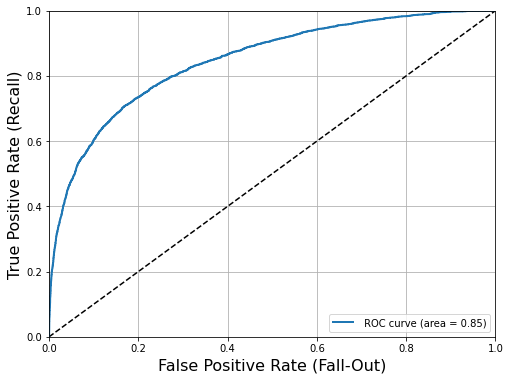

In [51]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

y_scores = lr_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

In [52]:
#prediction training result
model_pred_train = lr_model.predict(X_train)

MAE_train = mean_absolute_error(y_train, model_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, model_pred_train))

print('MAE Train : ', MAE_train)
print('RMSE Train : ', MAE_train)
print("R2 score : %.2f" % r2_score(y_train, model_pred_train))

MAE Train :  0.7797386944852382
RMSE Train :  0.7797386944852382
R2 score : -3.54


In [53]:
#prediction test result
model_pred_test = lr_model.predict(X_test)

MAE_test = mean_absolute_error(y_test, model_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, model_pred_test))

print('MAE Test : ', MAE_test)
print('RMSE Test : ', RMSE_test)
print("R2 score : %.2f" % r2_score(y_test, model_pred_test))

MAE Test :  0.7797471345858442
RMSE Test :  0.8830329181779376
R2 score : -3.54


### **Evaluation SVC**

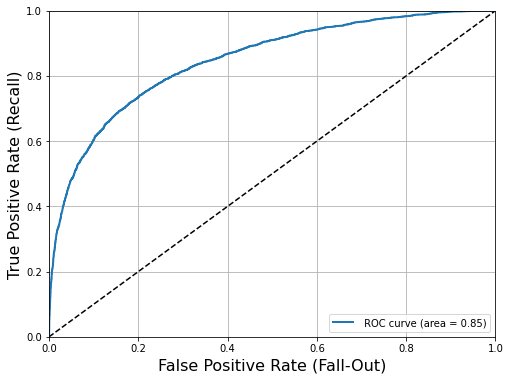

In [54]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

y_scores = svc_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

## **STEP 9 : KESIMPULAN**

Metode yang digunakan pada klasifikasi pada program ini menggunakan metode Logistic Regression dan Support Vector Machine(SVM) untuk memprediksi hujan dengan menggunakan dataset weatherAUS.csv

Source : https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Fungsi Recall dan Precision adalah untuk mengecek akurasi modelnya. Jika Precision semakin tinggi, maka recall akan turun. Begitu juga sebaliknya.

**Logistic Regression :**
* ROC curve = 0.85
* Precision = 0.22
* Recall = 1.00
* f1 score = 0.36

**SVC Linear :**
* ROC curve = 0.85
* Precision = 0.22
* Recall = 1.00
* f1 score = 0.36

**Kecepatan Training Model :**
* Logistic Regression : Wall time 106 ms
* SVC : Wall time 28.1 s.

**Kecepatan Training Inference :**
* Logistic Regression : Wall time: 1.3 s. 
* SVC : Wall time 20min 48s

Pada kedua model di atas, keduanya mendapatkan Roc dan Auc yang besar dan cocok untuk dataset ini. Namun perlu diperhatikan waktu yang dibutuhkan untuk menjalankan masing-masing model.

**Prediction training result :**
* MAE Train  : 0.7797386944852382
* RMSE Train : 0.7797386944852382
* R2 score   : -3.54

**prediction test result :**
* MAE Test  : 0.7797471345858442
* RMSE Test : 0.8830329181779376
* R2 score  : -3.54

Kedua pengujian tersebut memiliki hasil yang tidak jauh berbeda, dari segi nilai MAE, RMSE R2 Score tetap mendapatkan keakuratan dan error yang tidak jauh berbeda.